# Predicting Listing Gains in the Indian IPO Market Using TensorFlow

In the project, As a data scientist for an investment firm interested in investing in Indian Initial Public Offerings (IPOs). We aim to build a deep learning classification model to predict if the IPO will provide listing gains. Listing gains are the percentage increase in a company's share price from its initial public offering (IPO) price on the day of listing.

The dataset we'll be using for this project is from [moneycontrol](https://www.moneycontrol.com/ipo/ipo-historic-table?classic=true) and includes information on historical IPOs in the Indian market.

We'll go over all of the primary processes of the modeling pipeline, beginning with exploratory data analysis, then moving on to visualizing the key variables, and eventually developing a deep learning classification model.


In [1]:
import numpy as np 
import pandas as pd 

df = pd.read_csv("Indian_IPO_Market_Data.csv")
df

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20
...,...,...,...,...,...,...,...,...,...
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24


The data consists of following columns:

+ `Date`: date when the IPO was listed
+ `IPOName`: name of the IPO
+ `Issue_Size`: size of the IPO issue, in INR Crores
+ `Subscription_QIB`: number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category
+ `Subscription_HNI`: number of times the IPO was subscribed by the HNI (High Networth Individual) investor category
+ `Subscription_RII`: number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category
+ `Subscription_Total`: total number of times the IPO was subscribed overall
+ `Issue_Price`: the price in INR at which the IPO was issued
+ `Listing_Gains_Percent`: is the percentage gain in the listing price over the issue price

In [2]:
# shape of the dataset
df.shape 

(319, 9)

In [3]:
# information about the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


In [4]:
df["Listing_Gains_Percent"].describe()

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64

In [5]:
# summary statiatics
df.describe(include = "all")

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,287,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/08/21,Infinite Comp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,NaN,NaN,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,NaN,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,NaN,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,NaN,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000


# Exploring the Data

In [6]:
df["Listing_Gains_Profit"] = df["Listing_Gains_Percent"].apply(lambda x: 1 if x > 0 else 0)
df["Listing_Gains_Profit"].head()

0    1
1    0
2    1
3    0
4    0
Name: Listing_Gains_Profit, dtype: int64

In [7]:
for i in df.columns:
    print(F"The column {i} has {df[i].isna().sum()} missing values.")

The column Date  has 0 missing values.
The column IPOName has 0 missing values.
The column Issue_Size has 0 missing values.
The column Subscription_QIB has 0 missing values.
The column Subscription_HNI has 0 missing values.
The column Subscription_RII has 0 missing values.
The column Subscription_Total has 0 missing values.
The column Issue_Price has 0 missing values.
The column Listing_Gains_Percent has 0 missing values.
The column Listing_Gains_Profit has 0 missing values.


In [8]:
df = df.drop(["Date ","IPOName","Listing_Gains_Percent"], axis =1)
df.head(2)

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
0,189.8,48.44,106.02,11.08,43.22,165,1
1,328.7,59.39,51.95,3.79,31.11,145,0


In [9]:
print(df["Listing_Gains_Profit"].value_counts())
print(df["Listing_Gains_Profit"].value_counts(normalize = True) * 100) # in percentage

1    174
0    145
Name: Listing_Gains_Profit, dtype: int64
1    54.545455
0    45.454545
Name: Listing_Gains_Profit, dtype: float64


This shows that the average Initial Public Offerings (IPO) in the Indian market tends to list as profit.
About **`~55%`** of the observations were listed in profit. The data is fairly balanced. We have also dropped some of the variables that might not carry predictive power.

# Data Visualization 

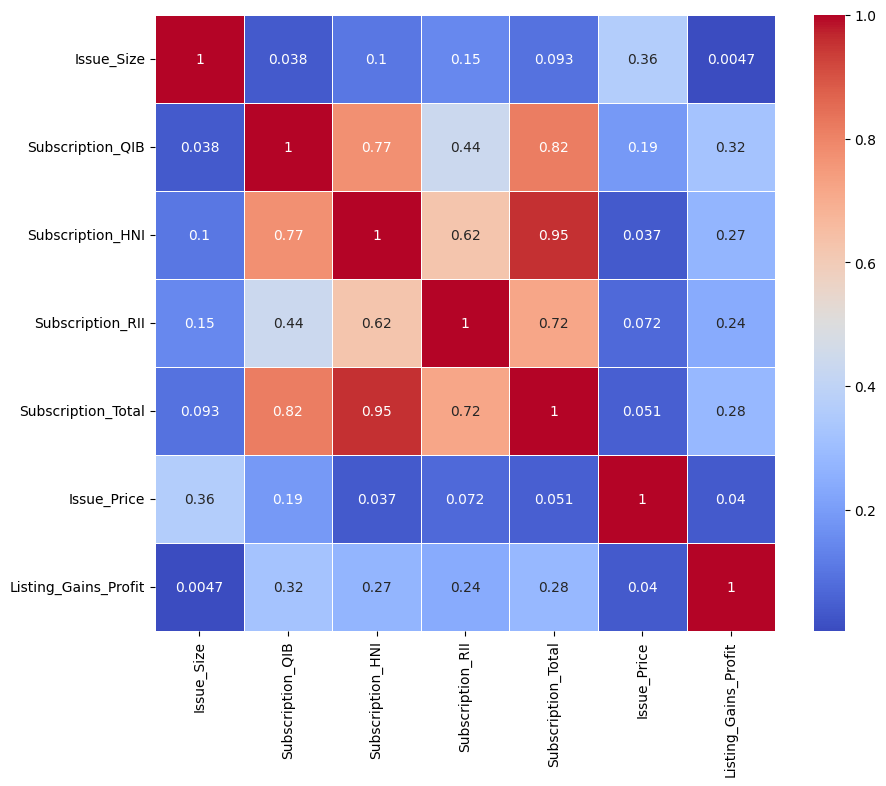

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation among features

plt.figure(figsize=[10,8])
sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

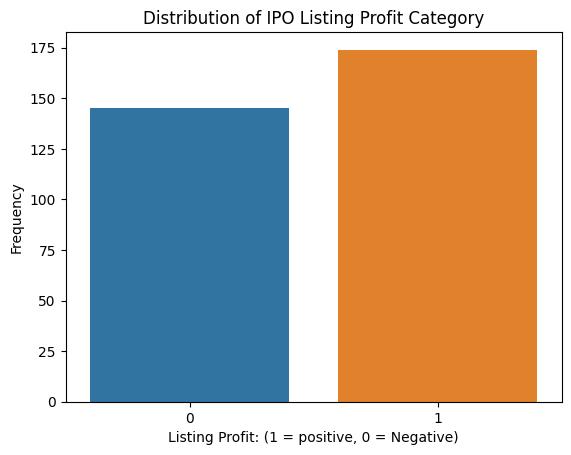

In [11]:
sns.countplot(data = df, x = "Listing_Gains_Profit")
plt.title("Distribution of IPO Listing Profit Category")
plt.ylabel("Frequency")
plt.xlabel("Listing Profit: (1 = positive, 0 = Negative)")
plt.show()

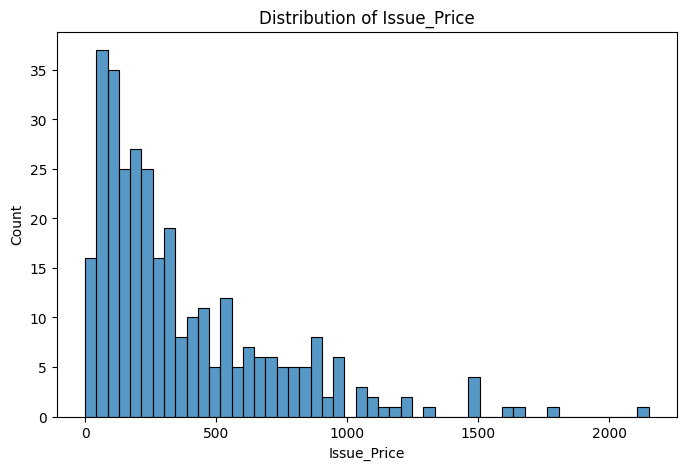

In [12]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Issue_Price', bins=50).set(title='Distribution of Issue_Price', ylabel='Count')
plt.show()

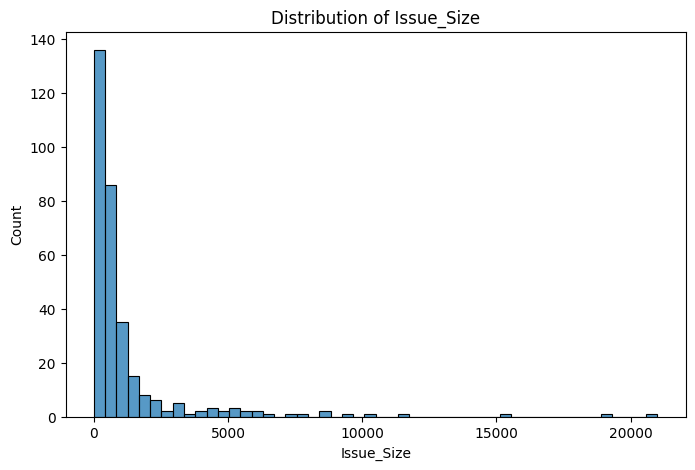

In [13]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Issue_Size', bins=50).set(title='Distribution of Issue_Size', ylabel='Count')
plt.show()

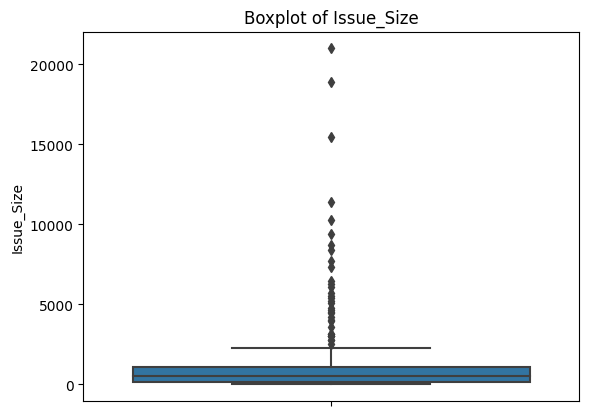

In [14]:
sns.boxplot(data=df, y='Issue_Size')
plt.title('Boxplot of Issue_Size')
plt.show()

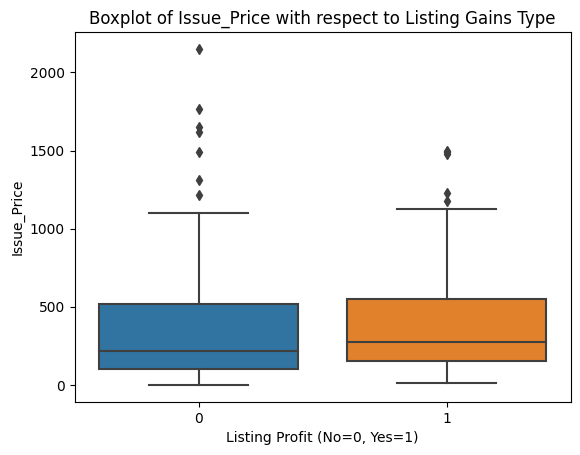

In [15]:
sns.boxplot(data=df, x='Listing_Gains_Profit', y='Issue_Price')
plt.title('Boxplot of Issue_Price with respect to Listing Gains Type')
plt.xlabel('Listing Profit (No=0, Yes=1)')
plt.show()

In [16]:
print(df.skew())

Issue_Size              4.853402
Subscription_QIB        2.143705
Subscription_HNI        3.078445
Subscription_RII        3.708274
Subscription_Total      2.911907
Issue_Price             1.696881
Listing_Gains_Profit   -0.183438
dtype: float64


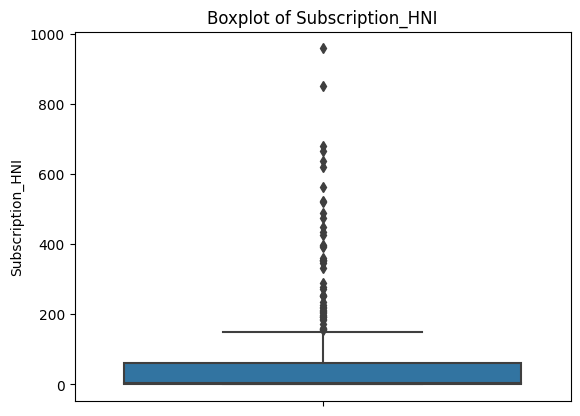

In [17]:
sns.boxplot(data=df, y='Subscription_HNI')
plt.title('Boxplot of Subscription_HNI')
plt.show()

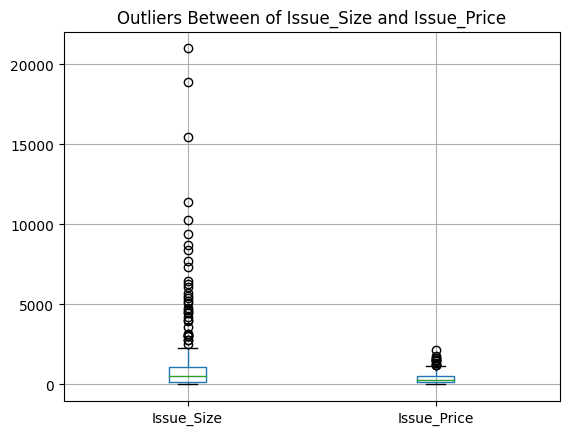

In [18]:
df[["Issue_Size","Issue_Price"]].boxplot()
plt.title('Outliers Between of Issue_Size and Issue_Price')
plt.show()

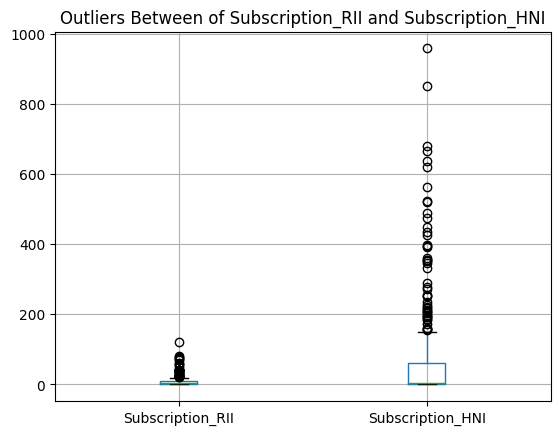

In [19]:
df[["Subscription_RII","Subscription_HNI"]].boxplot()
plt.title('Outliers Between of Subscription_RII and Subscription_HNI')
plt.show()

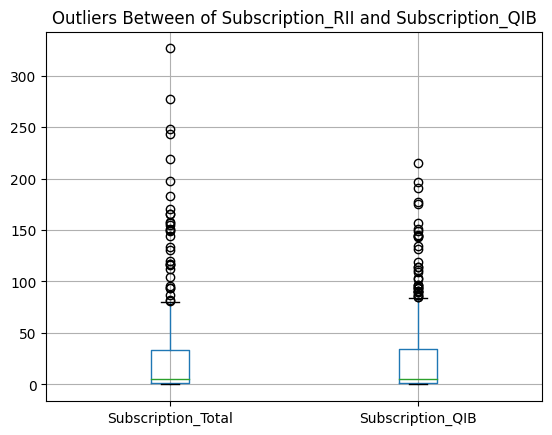

In [20]:
df[["Subscription_Total","Subscription_QIB"]].boxplot()
plt.title('Outliers Between of Subscription_RII and Subscription_QIB')
plt.show()

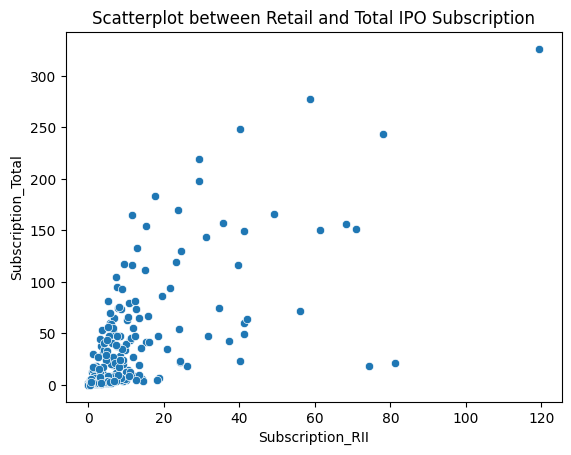

In [21]:
sns.scatterplot(data=df, x='Subscription_RII', y='Subscription_Total')
plt.title('Scatterplot between Retail and Total IPO Subscription')
plt.show()

Here are some of the findings that we can draw from the visualizations above:

+ The histogram and the boxplots show that outliers are present in the data and might need outlier treatment.

+ The boxplot of Issue_Price, with respect to Listing_Gains_Profit, shows that there are more outliers for IPOs that listed a loss than there are outliers for IPOs that listed a profit.

+ We also observed a correlation between Retail and Total IPO Subscription via a scatterplot. 

# Outlier Treatment
Since there are outliers in the data, we need to treat them. 

In [22]:
outliers_columns = ['Issue_Size', 'Subscription_QIB', 'Subscription_HNI',
       'Subscription_RII', 'Subscription_Total', 'Issue_Price']

for i in outliers_columns:
    q1 = df[i].quantile(q= 0.25)
    q3 = df[i].quantile(q= 0.75)
    iqr = q3 - q1
    lower = (q1 - (1.5*iqr))
    upper = (q3 + (1.5 * iqr))
    df[i] = df[i].clip(lower, upper)
    
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,763.561238,21.521183,40.356426,6.060940,20.456646,362.147335,0.545455
std,769.689122,29.104549,57.427921,6.176882,27.217740,312.272967,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,0.000000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.000000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,1.000000
max,2496.492500,84.862500,153.355000,19.600000,81.020000,1161.500000,1.000000


# Scaling Variables

During data exploration, we observed that the distribution of the variables differed significantly. This could influence the modeling process, so to prevent this, we performed normalization by scaling the predictors. You can see that the normalized values of the predictors lie between 0 and 1.

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=["Issue_Size", "Subscription_QIB", "Subscription_HNI", "Subscription_RII", "Subscription_Total", "Issue_Price", "Listing_Gains_Profit"])
df_scaled.head()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
0,0.076027,0.570806,0.691337,0.565306,0.533449,0.142058,1.0
1,0.131665,0.699838,0.338756,0.193367,0.383979,0.124839,0.0
2,0.022532,0.011666,0.108246,0.318878,0.063811,0.064572,1.0
3,0.080032,0.013198,0.023801,0.031633,0.015058,0.142058,0.0
4,0.000000,0.006128,0.009912,0.115306,0.013824,0.064572,0.0


In [24]:
df_scaled.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.305854,0.253601,0.263157,0.309232,0.252489,0.311793,0.545455
std,0.308308,0.342961,0.374477,0.315147,0.335939,0.268853,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067697,0.013551,0.008184,0.065051,0.020304,0.102454,0.000000
50%,0.198779,0.058212,0.033061,0.174490,0.060849,0.215239,1.000000
75%,0.440618,0.408131,0.404910,0.439031,0.412182,0.461472,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Creating Training and Test sets

In [25]:
from sklearn.model_selection import train_test_split

# 70% training set and 30% test set

X = df_scaled.drop("Listing_Gains_Profit", axis = 1)
y = df_scaled["Listing_Gains_Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

print(X_train.shape)
print(X_test.shape)

(223, 6)
(96, 6)


# Define the Deep Learning Classification Model

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.random.set_seed(100)
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(4, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In this step, we have defined the model by instantiating the sequential model class in TensorFlow's Keras. The model architecture is comprised of four hidden layers with `relu` as the activation function. The output layer uses a `sigmoid` activation function, which is a good choice for a binary classification model. 

#  Compile and Train the model

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train, y_train, epochs=250, verbose=0) 

In [30]:
model.evaluate(X_train, y_train)

7/7 [==============================] - 0s 1ms/step - loss: 0.5157 - accuracy: 0.7175


[0.515673041343689, 0.7174887657165527]

In [31]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.6771


[0.6880326271057129, 0.6770833134651184]

The model evaluation output shows the performance of the model on both training and test data. The accuracy was approximately 72% on the training data and 68% on the test data. Ideally, the higher the accuracy value, the better the model is performing. It's noteworthy that the training and test set accuracies are close to each other, which shows that there is consistency and that the accuracy doesn't drop too much when we test the model on unseen data.

# Conclusion
In this project, we used TensorFlow's Keras deep learning framework to build Deep Learning Classification models. We used a real-world IPO dataset to create a classifier algorithm that predicts whether an IPO will be profitable or not.

We built the model using the Sequential API, and it achieves a reasonable accuracy of **72%** on training data and 68% on test data. The accuracy is consistent throughout the training and test datasets, which is a positive indicator.

We can experiment with different parameter combinations to improve model performance.